In [ ]:
#While exploring the Aerial Bombing Operations of World War Two dataset and recalling that the D-Day landings were nearly postponed due to poor weather, 
#I downloaded these weather reports from the period to compare with missions in the bombing operations dataset.

#The dataset contains information on weather conditions recorded on each day at various weather stations around the world. 
#Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.
#So our task is to predict the maximum temperature taking input feature as the minimum temperature.
#Let's start coding :

In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:
weather = pd.read_csv("Summary_Weather.csv")

In [13]:
weather.shape

(119040, 31)

In [14]:
weather.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [16]:
#And finally, let’s plot our data points on a 2-D graph to eyeball our dataset 
#and see if we can manually find any relationship between the data using the below script :
#We have taken MinTemp and MaxTemp for doing our analysis. Below is a 2-D graph between MinTemp and MaxTemp.

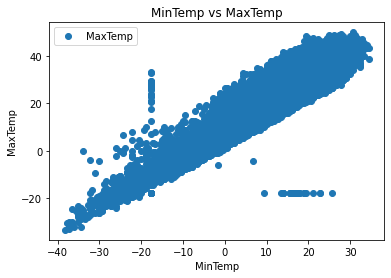

In [15]:
weather.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [ ]:
#Let’s check the average max temperature and once we plot it 
#we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.

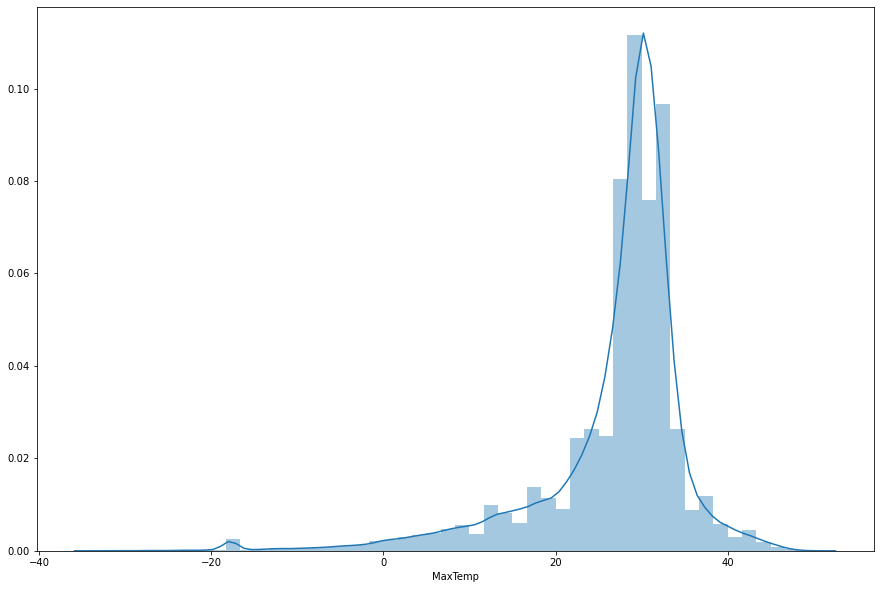

In [28]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(weather['MaxTemp'])

Average maximum temperature which is in between 25 and 35.
Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [37]:
x = weather['MinTemp'].values.reshape(-1,1)
y = weather['MaxTemp'].values.reshape(-1,1)
print([x,y])

[array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]]), array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])]


In [70]:
weather_minmax = weather.loc[:,['MinTemp','MaxTemp']]
weather_minmax

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
...,...,...
119035,18.333333,28.333333
119036,18.333333,29.444444
119037,18.333333,28.333333
119038,18.333333,28.333333


Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [41]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

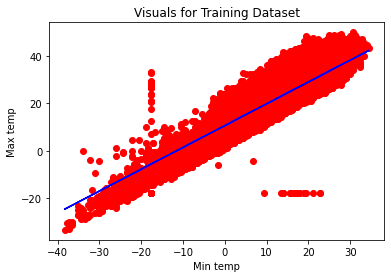

In [42]:
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Min temp")
plt.ylabel("Max temp")
plt.show()

In [45]:
print(regressor.intercept_, regressor.coef_)

[10.66185201] [[0.92033997]]


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.
Coef is positive which is good and linear regression looks ok on train graph but perhaps could be improved. We can use other calculations to check our model.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [47]:
regressor.score(x,y)

0.7715544932781936

R2 score isn't too bad, let's try the MSE and mean absolute error now

In [49]:
from sklearn.metrics import mean_squared_error , mean_absolute_error 
pred = regressor.predict(x)
print(np.sqrt(mean_squared_error(y,pred)))
print(mean_absolute_error(y,pred))

4.1667478193259555
3.182389623469075


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [53]:
y_pred = regressor.predict(x_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [74]:
weather_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
weather_pred

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


We can also visualize comparison result as a bar graph using the below script :
Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

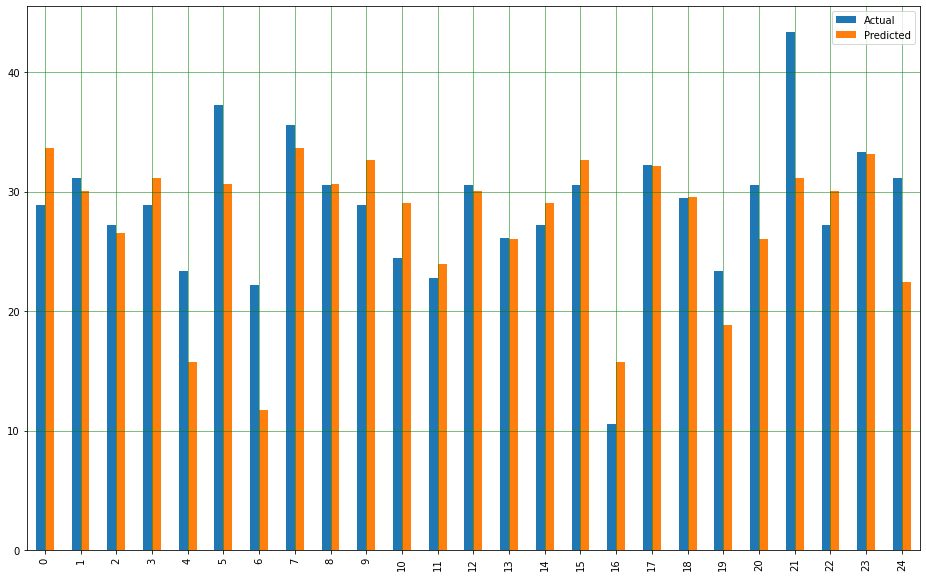

In [75]:
weather_pred1 = weather_pred.head(25)
weather_pred1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.
Let's plot our straight line with the test data :

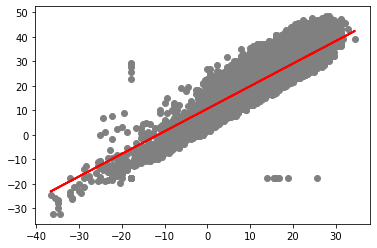

In [77]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785835
Mean Squared Error: 17.631568097568532
Root Mean Squared Error: 4.198996082109215


You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.